# Exercise 1 

In this exercise, we will practice applying a denoising encoder using the `FASHIO_MNIST` dataset.

### Exercise 1(a) (5 points)

Load the below libraries and the `FASHION_MNIST` dataset.

```
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import fashion_mnist

np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784
filters = [32, 32, 16]
```

In [32]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import fashion_mnist

np.random.seed(11)
tf.random.set_seed(11)
batch_size = 256
max_epochs = 50
learning_rate = 1e-3
momentum = 8e-1
hidden_dim = 128
original_dim = 784
filters = [32, 32, 16]

### Exercise 1(b) (5 points)

Load the `MNIST` data, and visualize the first 10 images from the `train` and `test` data sets.

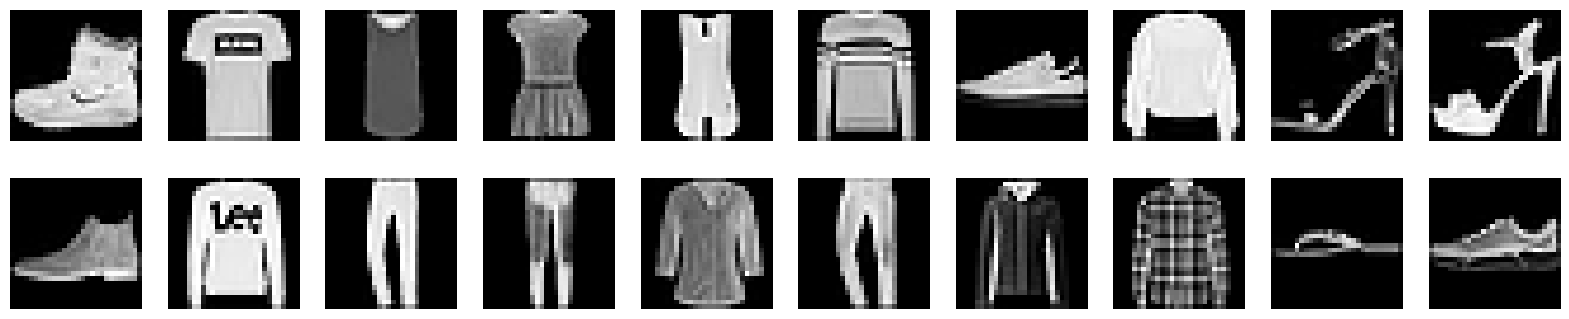

In [33]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

n = 10 
plt.figure(figsize=(20, 8))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

### Exercise 1(c) (5 points)

Normalize the data by dividing by 255. Then, reshape the data for the denoising autoencoder and the convolutional autoencoder.

In [34]:
# Normalizing the data for autoencoder
x_train_auto = x_train / 255
x_test_auto = x_test / 255

x_train_auto = x_train_auto.astype(np.float32)
x_test_auto = x_test_auto.astype(np.float32)

#reshaping the input data
x_train_auto = x_train_auto.reshape((x_train_auto.shape[0], original_dim))
x_test_auto = x_test_auto.reshape((x_test_auto.shape[0], original_dim))

# Normalizing the data for convolutional autoencoder
x_train_conv = x_train / 255
x_test_conv = x_test / 255

x_train_conv = x_train_conv.astype('float32')
x_test_conv = x_test_conv.astype('float32')

#reshaping the input data
x_train_conv = np.reshape(x_train_conv, (x_train_conv.shape[0], 28, 28, 1))
x_test_conv = np.reshape(x_test_conv, (x_test_conv.shape[0], 28, 28, 1))

### Exercise 1(d) (5 points)

Add noise to the `train` and `test` data sets for the denoising autoencoder and the convolutional autoencoder.

In [35]:
#adding noise to the data autoencoder data
noise_factor = 0.5
x_train_noisy_auto = x_train_auto + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_auto.shape)
x_test_noisy_auto = x_test_auto + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_auto.shape)
x_train_noisy_auto = np.clip(x_train_noisy_auto, 0., 1.)
x_test_noisy_auto = np.clip(x_test_noisy_auto, 0., 1.)

#adding noise to the convolutional data
x_train_noisy_conv = x_train_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_conv.shape)
x_test_noisy_conv = x_test_conv + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_conv.shape)
x_train_noisy_conv = np.clip(x_train_noisy_conv, 0., 1.)
x_test_noisy_conv = np.clip(x_test_noisy_conv, 0., 1.)

### Exercise 1(e) (10 points)

Define the denoising encoder model and train the autoencoder using the clean `train` data and the noisy `train` data for the denoising autoencoder. Validate it with the clean `test` data and the noisy `test` data for the denoising autoencoder. Additionally, visualize the loss.

In [36]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = Dense(units=hidden_dim, activation="relu")

    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return activation

class Decoder(tf.keras.layers.Layer):
    def __init__(self, hidden_dim, original_dim):
        super(Decoder, self).__init__()
        self.output_layer = Dense(units=original_dim, activation="relu")

    def call(self, encoded):
        activation = self.output_layer(encoded)
        return activation 

class Autoencoder(Model):
    def __init__(self, hidden_dim, original_dim):
        super(Autoencoder, self).__init__()
        self.loss = []
        self.encoder = Encoder(hidden_dim=hidden_dim)
        self.decoder = Decoder(hidden_dim=hidden_dim, original_dim=original_dim)

    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

In [37]:
# create an instance of the model
model_auto = Autoencoder(hidden_dim=hidden_dim, original_dim=original_dim)

# compile the model
model_auto.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate))

#trian the model
loss = model_auto.fit(x_train_noisy_auto, x_train_auto, validation_data=(x_test_noisy_auto, x_test_auto), epochs=max_epochs, batch_size=batch_size)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0685 - val_loss: 0.0280
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0266 - val_loss: 0.0238
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0230 - val_loss: 0.0217
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - val_loss: 0.0207
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0203 - val_loss: 0.0201
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0197 - val_loss: 0.0198
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193 - val_loss: 0.0195
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191 - val_loss: 0.0193
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0189 - val_loss: 0.0191
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0188 - val_loss: 0.0191
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0188 - val_loss: 0.0190
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

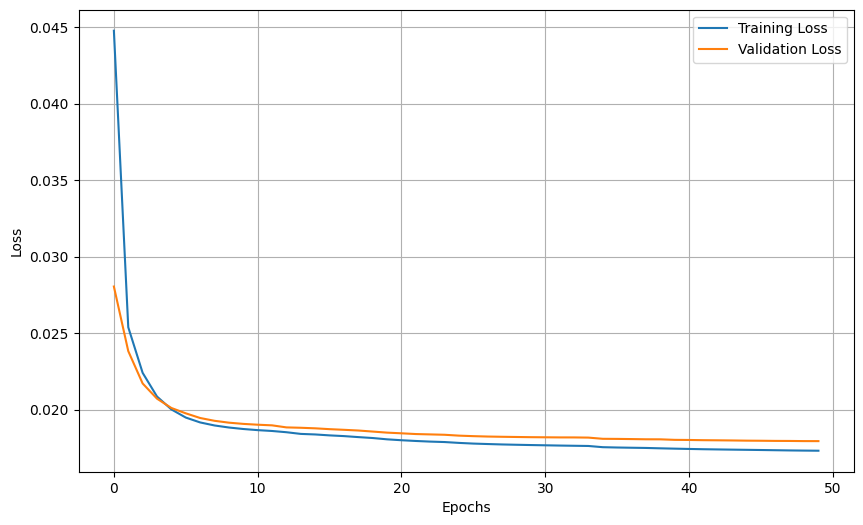

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), loss.history['loss'], label='Training Loss')
plt.plot(range(max_epochs), loss.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show();

### Exercise 1(f) (10 points)

Define the convolutional encoder model and train the autoencoder using the clean `train` data and the noisy `train` data for the convolutional autoencoder. Validate it with the clean `test` data and the noisy `test` data for the convolutional autoencoder. Additionally, visualize the loss.

In [39]:
class ConvEncoder(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(ConvEncoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.pool = MaxPooling2D((2, 2), padding='same')
               
    
    def call(self, input_features):
        x = self.conv1(input_features)
        #print("Ex1", x.shape)
        x = self.pool(x)
        #print("Ex2", x.shape)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.pool(x)
        return x
    
class ConvDecoder(tf.keras.layers.Layer):
    def __init__(self, filters):
        super(ConvDecoder, self).__init__()
        self.conv1 = Conv2D(filters=filters[2], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv2 = Conv2D(filters=filters[1], kernel_size=3, strides=1, activation='relu', padding='same')
        self.conv3 = Conv2D(filters=filters[0], kernel_size=3, strides=1, activation='relu', padding='valid')
        self.conv4 = Conv2D(1, 3, 1, activation='sigmoid', padding='same')
        self.upsample = UpSampling2D((2, 2))
  
    def call(self, encoded):
        x = self.conv1(encoded)
        #print("dx1", x.shape)
        x = self.upsample(x)
        #print("dx2", x.shape)
        x = self.conv2(x)
        x = self.upsample(x)
        x = self.conv3(x)
        x = self.upsample(x)
        return self.conv4(x)
    
class ConvAutoencoder(tf.keras.Model):
    def __init__(self, filters):
        super(ConvAutoencoder, self).__init__()
        self.loss = []
        self.encoder = ConvEncoder(filters)
        self.decoder = ConvDecoder(filters)

    def call(self, input_features):
        #print(input_features.shape)
        encoded = self.encoder(input_features)
        #print(encoded.shape)
        reconstructed = self.decoder(encoded)
        #print(reconstructed.shape)
        return reconstructed

In [40]:
# create an instance of the model
model_conv = ConvAutoencoder(filters)

# compile the model
model_conv.compile(loss='binary_crossentropy', optimizer='adam')

# train the model
loss = model_conv.fit(x_train_noisy_conv, x_train_conv, validation_data=(x_test_noisy_conv, x_test_conv), epochs=max_epochs, batch_size=batch_size)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 0.4434 - val_loss: 0.3286
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.3242 - val_loss: 0.3190
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.3161 - val_loss: 0.3149
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.3116 - val_loss: 0.3118
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.3090 - val_loss: 0.3096
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.3071 - val_loss: 0.3080
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - loss: 0.3057 - val_loss: 0.3068
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.3045 - val_loss: 0.3059
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.3034 - val_loss: 0.3050
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.3024 - val_loss: 0.3040
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.3016 - val_loss: 0.3032
Epoch 12/50
235/235 ━━━━━━━━━━

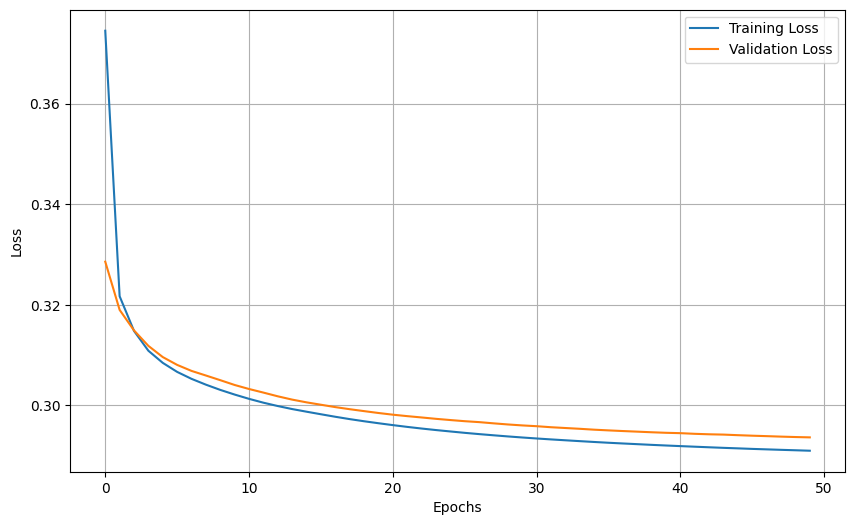

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(max_epochs), loss.history['loss'], label='Training Loss')
plt.plot(range(max_epochs), loss.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show();

### Exercise 1(g) (10 points)

Visualize the first 10 images from the noisy test data and their corresponding denoised images using a denoising autoencoder and a convolutional autoencoder. Based on these figures, which model do you think is better?

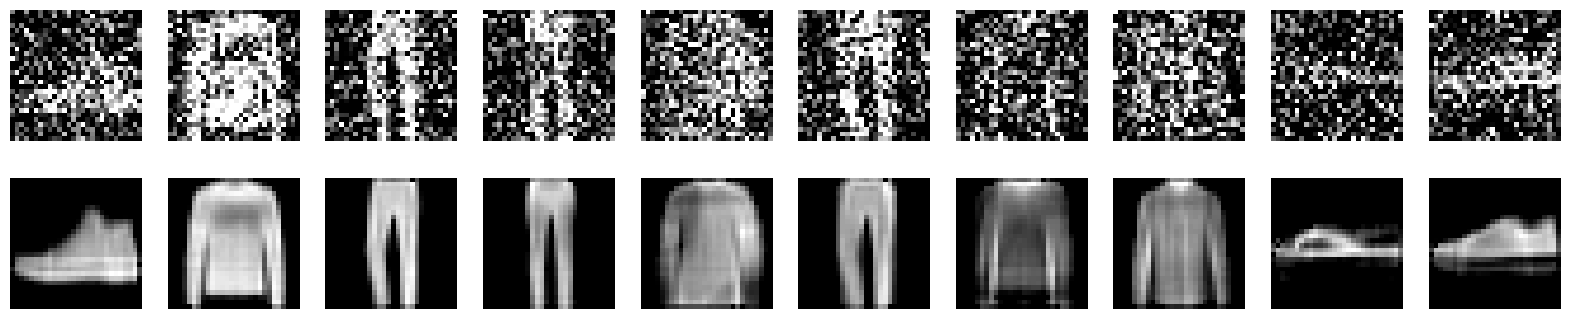

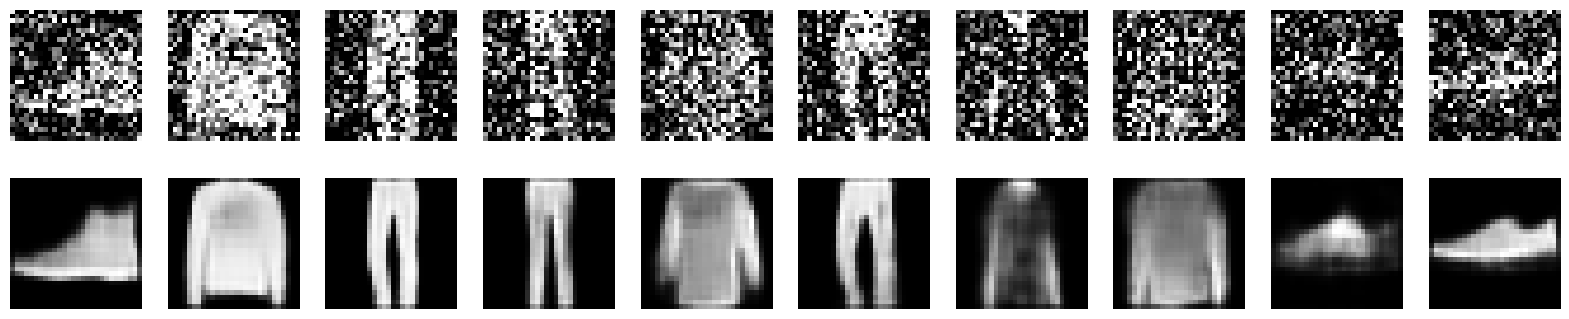

In [42]:
n = 10 

# visualize the autoencoder output
plt.figure(figsize=(20, 8))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy_auto[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(model_auto(x_test_noisy_auto)[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')
    
# visualize the convolutional autoencoder output
plt.figure(figsize=(20, 8))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy_conv[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, n, i+1+n)
    plt.imshow(model_conv(x_test_noisy_conv)[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

Based on the images above I think the autoencoder did better with most of the images and had slightly better detail.